## 04.04.2019

Let's implement the Plank function.
$B_\lambda (T) = \frac{2hc^2}{\lambda^5 (e^{hc/\lambda kT} - 1)}$

$h = 6.62 * 10^{-34}$ <br>
$c = 3 * 10^8$ <br>
$k = 1.38 * 10^{-23}$

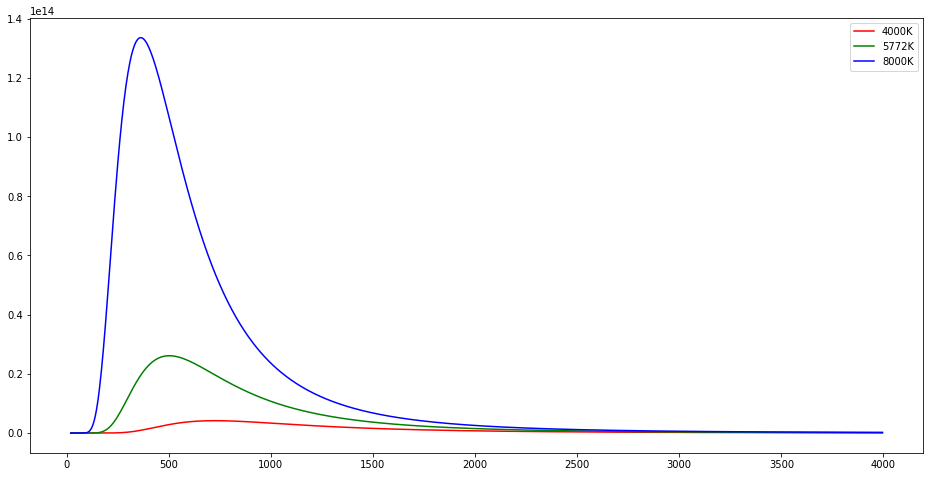

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

np.seterr(over = 'ignore')

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

wavelengths = np.arange(20e-9, 4e-6, 5e-9) 

intensity4000 = planck(wavelengths, 4000.)
intensity5772 = planck(wavelengths, 5772.)
intensity8000 = planck(wavelengths, 8000.)

plt.figure(figsize=(16, 8))
plt.plot(wavelengths*1e9, intensity4000, 'r-', label = '4000K') 
plt.plot(wavelengths*1e9, intensity5772, 'g-', label = '5772K') # 5000K green line
plt.plot(wavelengths*1e9, intensity8000, 'b-', label = '8000K') # 6000K blue line
plt.legend()
plt.show()

As can be seen from the graphs, an increase in temperature dramatically increases the amount of light emitted.

### Wien’s displacement law:
Now we will consider how the wavelength $\lambda_{max}$, at which the value of the lath function is maximal, depends on temperature.

In [4]:
print 'Lambda_max (4000K) =', round(wavelengths[np.argmax(intensity4000)]*10**9), 'nm'
print 'Wien’s displacement law:', 2.898*10**(6)/4000, 'nm'
print 'Lambda_max (5772K) =', round(wavelengths[np.argmax(intensity5772)]*10**9), 'nm'
print 'Wien’s displacement law:', 2.898*10**(6)/5772, 'nm'
print 'Lambda_max (8000K) =', round(wavelengths[np.argmax(intensity8000)]*10**9), 'nm'
print 'Wien’s displacement law:', 2.898*10**(6)/8000, 'nm'

Lambda_max (4000K) = 725.0 nm
Wien’s displacement law: 724.5 nm
Lambda_max (5772K) = 505.0 nm
Wien’s displacement law: 502.079002079 nm
Lambda_max (8000K) = 365.0 nm
Wien’s displacement law: 362.25 nm


As you can see, the results of a computer simulation are quite close to Wien’s law:<br>
$\lambda_{max} = \frac{2.898*10^{-3}}{T} [m]$

### Total radiation flux
Now let's calculate how do the total radiation flux depend on T<br>
To calculate it let's calculate numerical integral of Plank function.

In [8]:
int4k = quad(planck, 2e-9, 4e-6, args = (4000))[0]
int5k = quad(planck, 2e-9, 4e-6, args = (5772))[0]
int8k = quad(planck, 2e-9, 4e-6, args = (8000))[0]
int12k = quad(planck, 2e-9, 4e-6, args = (12000))[0]

In [12]:
print 'T\t Flux\t\t T^4\t\t\t Flux/(T^4)'
print 4000, '\t', int4k, '\t', 4000**4, '\t', int4k/4000**4
print 5772, '\t', int5k, '\t', 5772**4, '\t', int5k/5772**4
print 8000, '\t', int8k, '\t', 8000**4, '\t', int8k/8000**4
print 12000, '\t', int12k, '\t', 12000**4, '\t', int12k/12000**4

T	 Flux		 T^4			 Flux/(T^4)
4000 	4484534.45688 	256000000000000 	1.75177127222e-08
5772 	19773806.6995 	1109954789888256 	1.78149658703e-08
8000 	73401303.816 	4096000000000000 	1.79202401894e-08
12000 	372601902.425 	20736000000000000 	1.79688417451e-08


It looks like flux the total radiation flux linearly dependent on $T^4$ (PS: Stefan and Boltzmann noticed it long before us).<br>
Let's chech it:

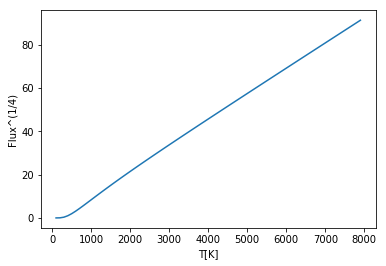

In [14]:
kek = []
for i in range(100, 8000, 100):
    kek.append(quad(planck, 1e-9, 3e-6, args = (i))[0])
kek2 = np.array(kek)
quad(planck, 1e-9, 4e-6, args = (4000))[0]
plt.xlabel('T[K]')
plt.ylabel('Flux^(1/4)')
plt.plot(range(100, 8000, 100), kek2**0.25)
plt.show()

Yes, that's it!

### Total energy
Now let's calculate the total energy per second emitted by the Sun into all directions:<br>
$W = F * 4 \pi R_{sun}^2 * \pi$

In [15]:
sunr = 695510000
power = 4*(sunr**2)*np.pi**2*int5k
print "Power = ", power, "[W]"

Power =  3.77621556792e+26 [W]


### <s> I see you</s> What can we see?

Now let's calculate how large is the fraction of the solar luminosity that is emitted in the optical part of the spectrum (in %).

In [21]:
print 'We can see ', \
    round(quad(planck, 380e-9, 750e-9, args = (4000))[0]/quad(planck, 1e-9, 3e-6, args = (4000))[0], 3)*100, '%', \
    'of all light of a black body with T = 4000K'
print 'We can see ', \
    round(quad(planck, 380e-9, 750e-9, args = (5774))[0]/quad(planck, 1e-9, 3e-6, args = (5774))[0], 3)*100, '%', \
    'of all light of a black body with T = 5774K'
print 'We can see ', \
    round(quad(planck, 380e-9, 750e-9, args = (8000))[0]/quad(planck, 1e-9, 3e-6, args = (8000))[0], 3)*100, '%', \
    'of all light of a black body with T = 8000K'

We can see  27.4 % of all light of a black body with T = 4000K
We can see  44.7 % of all light of a black body with T = 5774K
We can see  46.0 % of all light of a black body with T = 8000K
